# Project 1: Microsoft's Entry to the Film Industry

Please fill out:
* Sam Lim
* Full Time Online
* Victor Geislinger



In [ ]:
# what do you expect to find from these data sets?

# Microsoft sees all the big companies creating original video content and they want to get in on the fun. 
# They have decided to create a new movie studio, but they don’t know anything about creating movies. 
# You are charged with exploring what types of films are currently doing the best at the box office. 
# You must then translate those findings into actionable insights that the head of Microsoft's 
# new movie studio can use to help decide what type of films to create.


## Overview

This project aims to analyze the types of movies that generates the most revenue. Factors such as the movie's ratings (PG, G, PG-13, etc.), number of votes for scores it received, as well as the average of the users' scores by genres were used to help determine which type(s) of movies Microsoft should create.  

### Business Problem

Microsoft does not have prior experience in the film industry, and needs to minimize the risk of entering a new industry. However, there are numerous genres of movies as well as the budgeting problem. This project aims to aid Microsoft by providing datas related to these problems.

## 

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

In [2]:
movie_gross_df=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_name_basics_df=pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_title_akas_df=pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_title_basics_df=pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_crew_df=pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_title_principals_df=pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_title_ratings_df=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
rt_movie_info_df=pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t', header=0)
rt_reviews_df=pd.read_csv('zippedData/rt.reviews.tsv.gz',sep='\t',header=0, encoding='latin-1')
tmdb_movies_df=pd.read_csv('zippedData/tmdb.movies.csv.gz')
tn_movie_budgets_df=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [3]:
imdb_title_and_ratings_df=imdb_title_ratings_df.join(imdb_title_basics_df.set_index('tconst'),on='tconst')
# made new df joining title of movie and average rating
imdb_title_and_ratings_df=imdb_title_and_ratings_df.drop(columns=['start_year','runtime_minutes']) 
#don't need start year and runtime minutes


In [4]:
title_and_ratings_df=imdb_title_and_ratings_df.copy() #attempting to give each genre ratings
# new_title_and_ratings_df=pd.DataFrame(columns=[imdb_title_and_ratings_df.columns])

In [5]:
new_title_and_ratings_df=title_and_ratings_df.drop(columns=['tconst','primary_title','original_title'])
# new_title_and_ratings_df=title_and_ratings_df.copy()
new_title_and_ratings_df=title_and_ratings_df.genres.str.split(',').apply(pd.Series)
new_title_and_ratings_df.index= title_and_ratings_df.set_index(['averagerating','numvotes']).index
new_title_and_ratings_df=new_title_and_ratings_df.stack().reset_index(['averagerating','numvotes'])
new_title_and_ratings_df=new_title_and_ratings_df.reset_index()
new_title_and_ratings_df=new_title_and_ratings_df.rename(columns={0:'genre'})
new_title_and_ratings_df=new_title_and_ratings_df.groupby('genre')['averagerating','numvotes'].mean()
#found average rating of each genre!!!!!

<ipython-input-5-fd3d53a0a1d4>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_title_and_ratings_df=new_title_and_ratings_df.groupby('genre')['averagerating','numvotes'].mean()


In [6]:
#had to normalize because the difference between average rating and number of votes were significantly different
#if only number of votes were noramlized, the difference between the two columns were also significant
# however, just dividing the average rating by 10 made the bar graph much more intuitive
cols_to_norm = ['numvotes'] 
new_title_and_ratings_df[cols_to_norm] = new_title_and_ratings_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [7]:
new_title_and_ratings_df['averagerating']=new_title_and_ratings_df['averagerating']/10
new_title_and_ratings_df=new_title_and_ratings_df.drop(['Adult','Short'],axis=0) 
# getting rid of adult films and short films because they have very low numbers of votes and/or ratings


In [94]:
new_title_and_ratings_df

,averagerating,numvotes
genre,,
Action,0.581036,0.655877
Adventure,0.619620,1.000000
Animation,0.624831,0.398942
Biography,0.716227,0.256814
Comedy,0.600269,0.194455
Crime,0.611544,0.389259
Documentary,0.733209,0.011739
Drama,0.640156,0.175685
Family,0.639472,0.114384


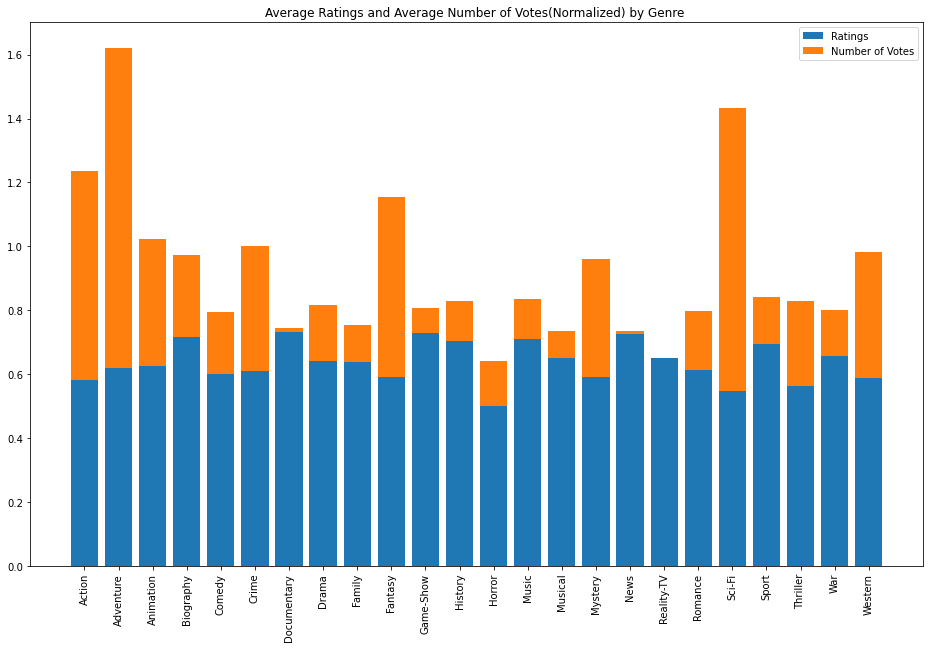

In [96]:
plt.figure(figsize=(16,10))
genre_rating=plt.bar(new_title_and_ratings_df.index,new_title_and_ratings_df['averagerating'])
genre_votes=plt.bar(new_title_and_ratings_df.index,new_title_and_ratings_df['numvotes'],bottom=new_title_and_ratings_df['averagerating'])
plt.title('Average Ratings and Average Number of Votes(Normalized) by Genre ')
plt.legend((genre_rating[0], genre_votes[0]), ('Ratings', 'Number of Votes'))
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0,1.7,0.2))
plt.show()

#Note that because some movies have multiple genres, the number of votes and ratings were repeated

In [8]:
new_rt_info_df=rt_movie_info_df.copy()
new_rt_info_df=new_rt_info_df.dropna(axis=0,subset=['box_office']) 
#dropping movies that do not have box office values since this is what we're most interested at

In [9]:
new_rt_info_df=new_rt_info_df.drop(columns=['synopsis','studio'])
new_rt_info_df['box_office']=new_rt_info_df['box_office'].str.replace(',','').astype('int64')

In [10]:
genre_boxoffice_df=new_rt_info_df.genre.str.split('|').apply(pd.Series)
genre_boxoffice_df.index= new_rt_info_df.set_index(['rating','box_office']).index
genre_boxoffice_df=genre_boxoffice_df.stack().reset_index(['rating','box_office'])
genre_boxoffice_df=genre_boxoffice_df.reset_index()
genre_boxoffice_df=genre_boxoffice_df.rename(columns={0:'genre'})
genre_boxoffice_df=genre_boxoffice_df.drop(columns=['index'])
genre_boxoffice_table=genre_boxoffice_df.groupby(['genre']).mean()#,'rating'])#['box_office']


In [34]:
genre_boxoffice_table

,box_office
genre,
Action and Adventure,6.232875e+07
Animation,5.619246e+07
Art House and International,2.222098e+06
Classics,6.750000e+06
Comedy,4.191096e+07
Cult Movies,1.390000e+07
Documentary,1.185648e+07
Drama,2.825376e+07
Faith and Spirituality,5.380785e+06


In [36]:
rating_boxoffice_df=genre_boxoffice_df.groupby(['rating']).mean()

[Text(0.5, 0, 'Genres'), Text(0, 0.5, 'Box Office Revenue (in $10 millions)')]

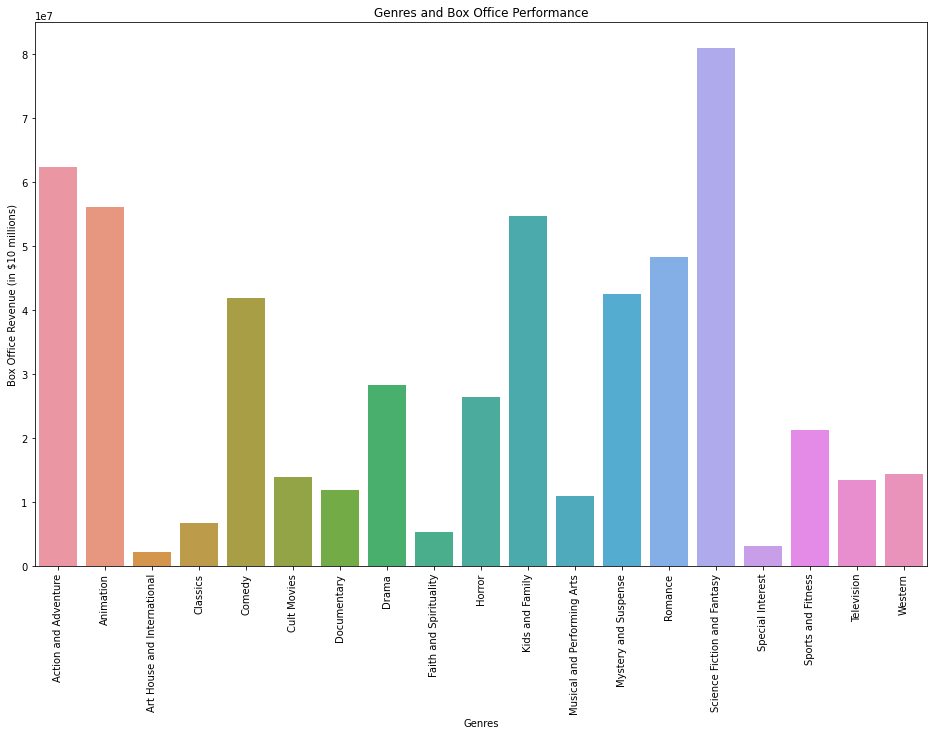

In [39]:
plt.figure(figsize=(16,10))
plt.title('Genres and Box Office Performance')
plt.xticks(rotation='vertical')
sns.barplot(data=genre_boxoffice_df,x=genre_boxoffice_table.index,y=genre_boxoffice_table['box_office']).set(xlabel='Genres',ylabel='Box Office Revenue (in $10 millions)')

<AxesSubplot:title={'center':'Number of Movies per Rating'}, xlabel='Rating', ylabel='Count'>

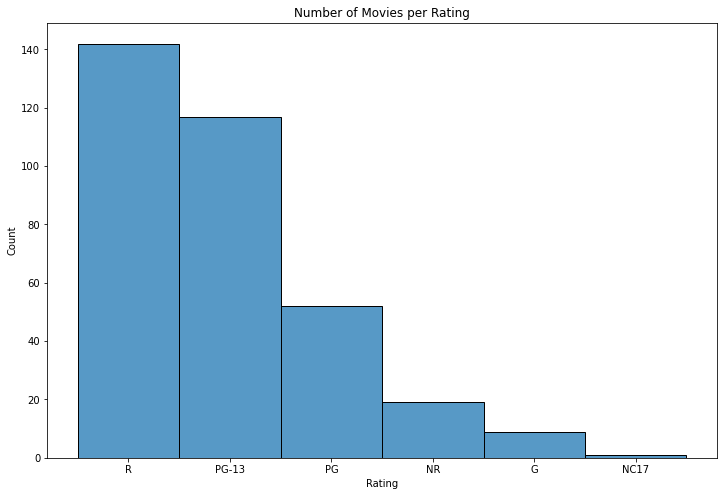

In [13]:
plt.figure(figsize=(12,8))
plt.title('Number of Movies per Rating')
plt.xlabel('Rating')
sns.histplot(data=new_rt_info_df,x=new_rt_info_df['rating'],stat='count')

[Text(0.5, 0, 'Motion Picture Association Rating'),
 Text(0, 0.5, 'Box Office Revenue (in $10 millions)')]

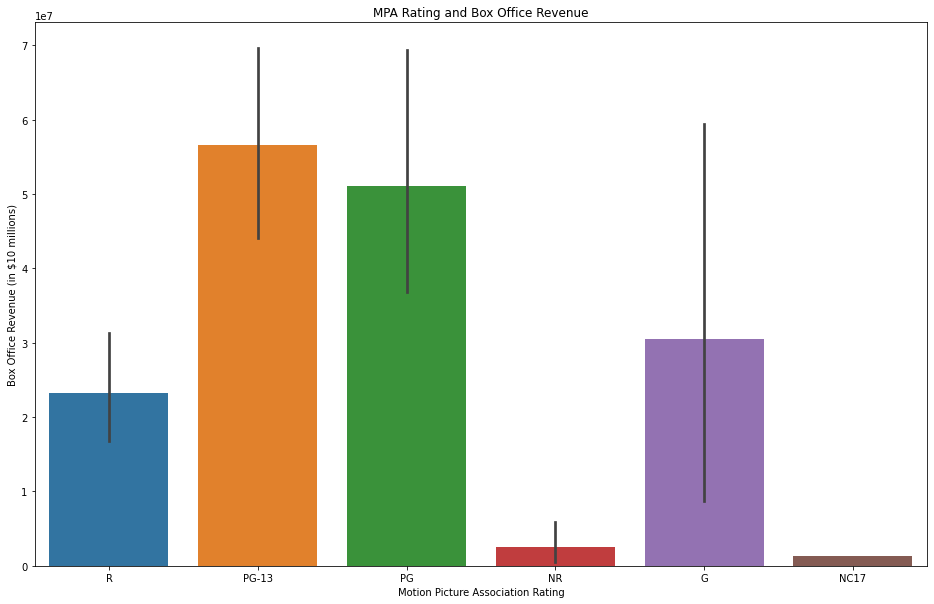

In [42]:
plt.figure(figsize=(16,10))
plt.title('MPA Rating and Box Office Revenue')
sns.barplot(data=new_rt_info_df,x=new_rt_info_df['rating'],y=new_rt_info_df['box_office']).set(xlabel='Motion Picture Association Rating',ylabel='Box Office Revenue (in $10 millions)')

In [14]:
tmdb_movies_df=tmdb_movies_df.drop(columns=['Unnamed: 0'])
tmdb_movies_df.head()


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [17]:
tn_movie_budgets_df['production_budget']=tn_movie_budgets_df['production_budget'].str.replace('$','').str.replace(',','').astype('int64')
tn_movie_budgets_df['domestic_gross']=tn_movie_budgets_df['domestic_gross'].str.replace('$','').str.replace(',','').astype('int64')
tn_movie_budgets_df['worldwide_gross']=tn_movie_budgets_df['worldwide_gross'].str.replace('$','').str.replace(',','').astype('int64')
# changing production budget, domestic gross, and worldwide gross from str to float to use for xticks and yticks
# in the scatter plot

# for some reason making the series above into type int64 or float64 makes the graphs different.

In [40]:
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [26]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


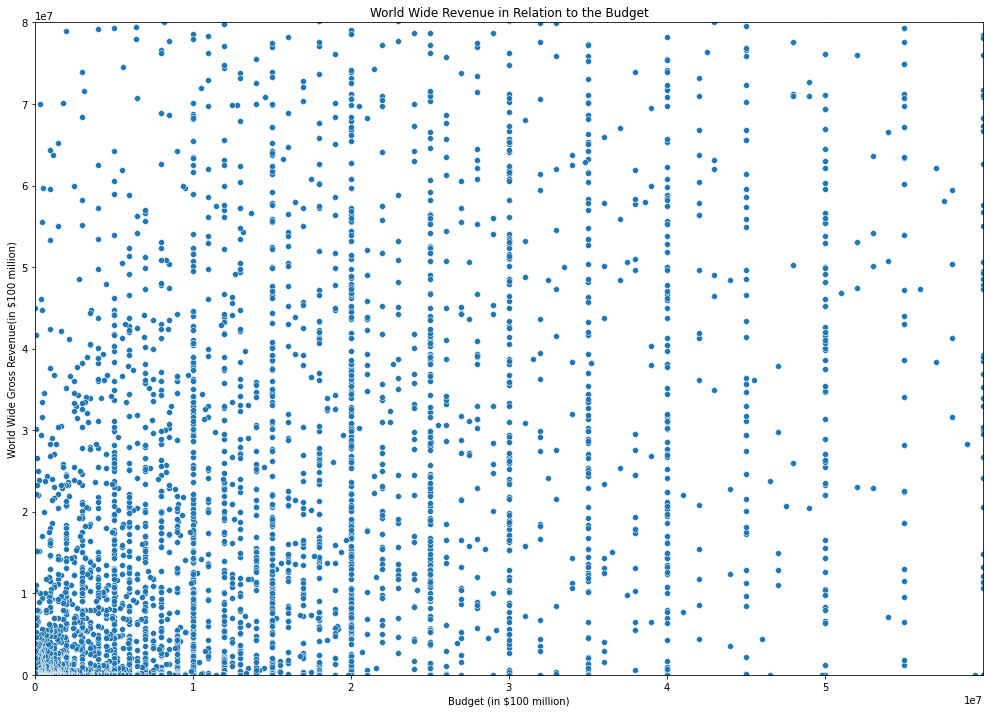

In [51]:
plt.figure(figsize=(17,12))
plt.title('World Wide Revenue in Relation to the Budget')
plt.xlabel('Budget (in $100 million)')
plt.ylabel('World Wide Gross Revenue(in $100 million)')
plt.xticks(np.arange(min(tn_movie_budgets_df['production_budget']),max(tn_movie_budgets_df['production_budget']),10000000))
plt.yticks(np.arange(min(tn_movie_budgets_df['worldwide_gross']),max(tn_movie_budgets_df['worldwide_gross']),10000000))
plt.xlim([0,60000000]) #use ylim to create bounds (basically zoomed in)
plt.ylim([0,80000000])
sns.scatterplot(x=tn_movie_budgets_df['production_budget'],y=tn_movie_budgets_df['worldwide_gross'])#,s=55, cmap=cmap, norm=norm)

plt.show() #maybe add a trendline, if that's gonna help at all 
#https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas/41635626

In [39]:
movie_gross_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [16]:
movie_gross_df['domestic_gross']=movie_gross_df['domestic_gross'].fillna(movie_gross_df['domestic_gross'].mean())

In [17]:
movie_gross_df['domestic_gross'].describe()

count    3.387000e+03
mean     2.874585e+07
std      6.670497e+07
min      1.000000e+02
25%      1.225000e+05
50%      1.400000e+06
75%      2.874585e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64